In [88]:
import pandas_datareader.data as web
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
import seaborn as sb
import matplotlib.pyplot as plt
import keras
import os
import pandas as pd

In [89]:
df = web.DataReader('MSFT', 'stooq', start='1900-01-01', end='2022-10-05')
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2022-10-05,245.299,249.876,243.414,248.500,2.040448e+07
2022-10-04,244.401,249.656,244.287,248.181,3.498674e+07
2022-10-03,234.748,240.931,234.001,240.063,2.896175e+07
2022-09-30,237.620,239.864,232.076,232.245,3.579543e+07
2022-09-29,238.189,239.276,233.751,236.833,2.756169e+07
2022-09-28,236.145,241.649,234.070,240.393,2.911149e+07
2022-09-27,239.306,241.120,233.841,235.746,2.709488e+07
2022-09-26,236.379,240.771,236.234,236.783,2.777224e+07
2022-09-23,238.867,240.452,234.539,237.251,3.427236e+07


In [90]:
df.reset_index(inplace=True)
df.describe()

,Open,High,Low,Close,Volume
count,9215.000000,9215.000000,9215.000000,9215.000000,9.214000e+03
mean,40.104739,40.528079,39.667368,40.113233,7.759741e+07
std,65.091086,65.747807,64.378929,65.096898,5.516562e+07
min,0.062951,0.062951,0.062951,0.062951,3.268060e+06
25%,3.394515,3.433675,3.335740,3.418090,4.121986e+07
50%,20.265400,20.506500,20.046900,20.273200,6.858116e+07
75%,32.421250,32.825800,32.014750,32.429700,9.795391e+07
max,341.422000,346.426000,339.019000,339.922000,1.463519e+09


In [91]:
corr = df.corr(method='pearson')
corr

/var/folders/g6/l7z0f90d4x73skf2x96_j5rh0000gp/T/ipykernel_40019/1487081547.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='pearson')


,Open,High,Low,Close,Volume
Open,1.000000,0.999942,0.999927,0.999856,-0.361602
High,0.999942,1.000000,0.999903,0.999923,-0.360536
Low,0.999927,0.999903,1.000000,0.999931,-0.362865
Close,0.999856,0.999923,0.999931,1.000000,-0.361780
Volume,-0.361602,-0.360536,-0.362865,-0.361780,1.000000


<AxesSubplot: >

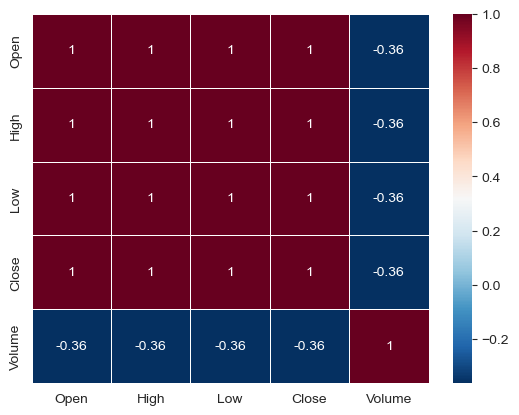

In [92]:
sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r', annot=True, linewidth=0.5)

In [93]:
# Drop Volume and Adj Close
df = df.drop('Volume', 1)

/var/folders/g6/l7z0f90d4x73skf2x96_j5rh0000gp/T/ipykernel_40019/282343396.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Volume', 1)


In [94]:
df

,Date,Open,High,Low,Close
0,2022-10-05,245.299000,249.876000,243.414000,248.500000
1,2022-10-04,244.401000,249.656000,244.287000,248.181000
2,2022-10-03,234.748000,240.931000,234.001000,240.063000
3,2022-09-30,237.620000,239.864000,232.076000,232.245000
4,2022-09-29,238.189000,239.276000,233.751000,236.833000
...,...,...,...,...,...
9210,1986-03-19,0.070576,0.070576,0.070576,0.070576
9211,1986-03-18,0.070576,0.070576,0.070576,0.070576
9212,1986-03-17,0.070576,0.070576,0.070576,0.070576
9213,1986-03-14,0.070576,0.070576,0.070576,0.070576


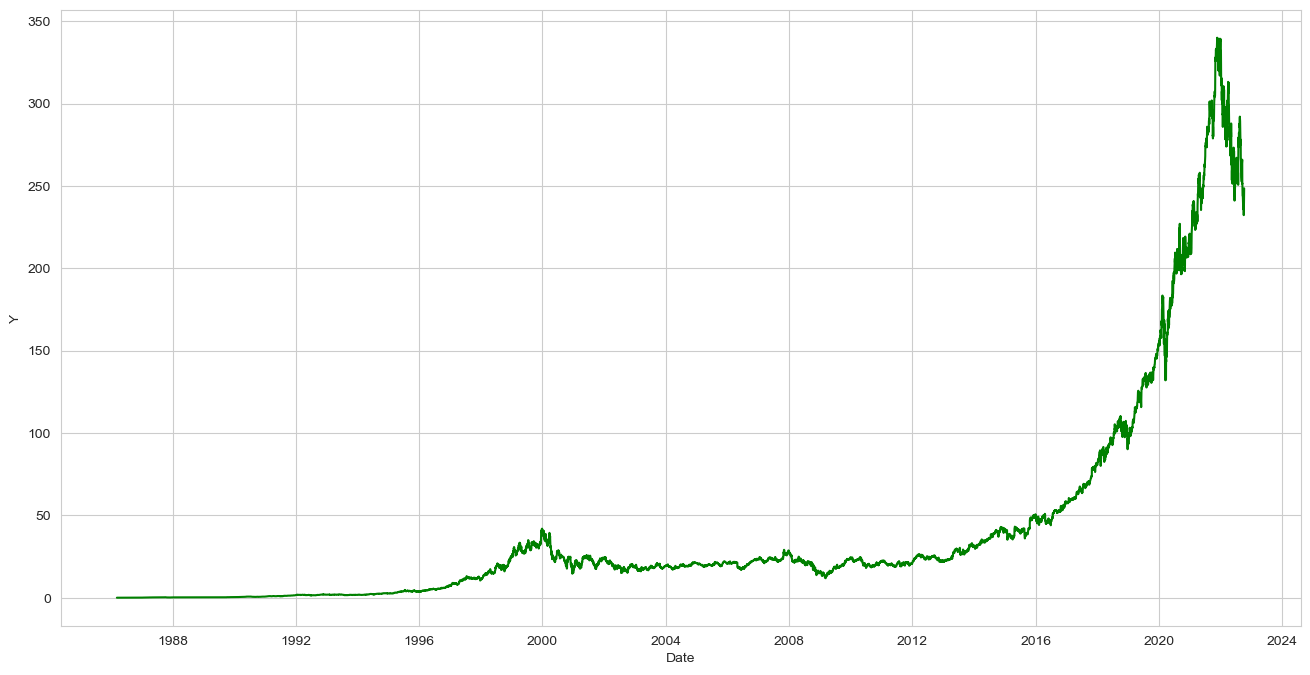

In [95]:
fig, ax = plt.subplots(figsize=(16,8))
sb.lineplot(x = df['Date'], y = df['Close'], ax=ax, data=df, color='green')
sb.set_style('darkgrid')
ax.set_xlabel('Date')
ax.set_ylabel('Y')
plt.show()

In [96]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [97]:
msft = df[['Day', 'Month', 'Year', 'High', 'Open', 'Low', 'Close']]
msft.tail(10)

,Day,Month,Year,High,Open,Low,Close
9205,26,3,1986,0.070576,0.062951,0.062951,0.062951
9206,25,3,1986,0.062951,0.062951,0.062951,0.062951
9207,24,3,1986,0.062951,0.062951,0.062951,0.062951
9208,21,3,1986,0.070576,0.070576,0.062951,0.062951
9209,20,3,1986,0.070576,0.070576,0.062951,0.070576
9210,19,3,1986,0.070576,0.070576,0.070576,0.070576
9211,18,3,1986,0.070576,0.070576,0.070576,0.070576
9212,17,3,1986,0.070576,0.070576,0.070576,0.070576
9213,14,3,1986,0.070576,0.070576,0.070576,0.070576
9214,13,3,1986,0.070576,0.062951,0.062951,0.070576


In [98]:
# Separate features from the target
X = msft.loc[:, msft.columns != 'Close']
y = msft['Close']

In [99]:
print(X.shape)
print(y.shape)

(9215, 6)
(9215,)


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7372, 6)
(7372,)
(1843, 6)
(1843,)


In [101]:

baseline_model = keras.Sequential([
    keras.layers.Dense(64, input_shape=X_train.shape[1:], activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1),
])
baseline_model.build(X_train.shape[1:])

In [102]:
baseline_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 64)                448       
                                                                 
 dense_24 (Dense)            (None, 64)                4160      
                                                                 
 dense_25 (Dense)            (None, 8)                 520       
                                                                 
 dense_26 (Dense)            (None, 1)                 9         
                                                                 
Total params: 5,137
Trainable params: 5,137
Non-trainable params: 0
_________________________________________________________________


In [103]:
baseline_model.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    loss='mse', metrics=['mse', 'mae'])

In [104]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, verbose=1)
baseline_model_history = baseline_model.fit(X_train,y_train,validation_split=0.2,epochs=200, callbacks=[early_stopping])

Epoch 1/200


/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]
2022-12-09 02:42:27.339028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


185/185 [==============================] - ETA: 0s - loss: 1015.1749 - mse: 1015.1749 - mae: 21.0927

2022-12-09 02:42:30.532322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


185/185 [==============================] - 4s 18ms/step - loss: 1015.1749 - mse: 1015.1749 - mae: 21.0927 - val_loss: 358.0447 - val_mse: 358.0447 - val_mae: 18.1589
Epoch 2/200
185/185 [==============================] - 2s 12ms/step - loss: 194.5037 - mse: 194.5037 - mae: 12.4492 - val_loss: 199.5539 - val_mse: 199.5539 - val_mae: 11.0667
Epoch 3/200
185/185 [==============================] - 2s 13ms/step - loss: 94.1342 - mse: 94.1342 - mae: 7.6615 - val_loss: 16.5890 - val_mse: 16.5890 - val_mae: 3.3492
Epoch 4/200
185/185 [==============================] - 2s 12ms/step - loss: 69.3087 - mse: 69.3087 - mae: 6.9203 - val_loss: 55.5631 - val_mse: 55.5631 - val_mae: 5.3338
Epoch 5/200
185/185 [==============================] - 2s 12ms/step - loss: 51.9560 - mse: 51.9560 - mae: 6.2187 - val_loss: 32.6511 - val_mse: 32.6511 - val_mae: 5.4887
Epoch 6/200
185/185 [==============================] - 2s 12ms/step - loss: 42.9746 - mse: 42.9746 - mae: 5.3888 - val_loss: 36.3310 - val_mse: 36.3

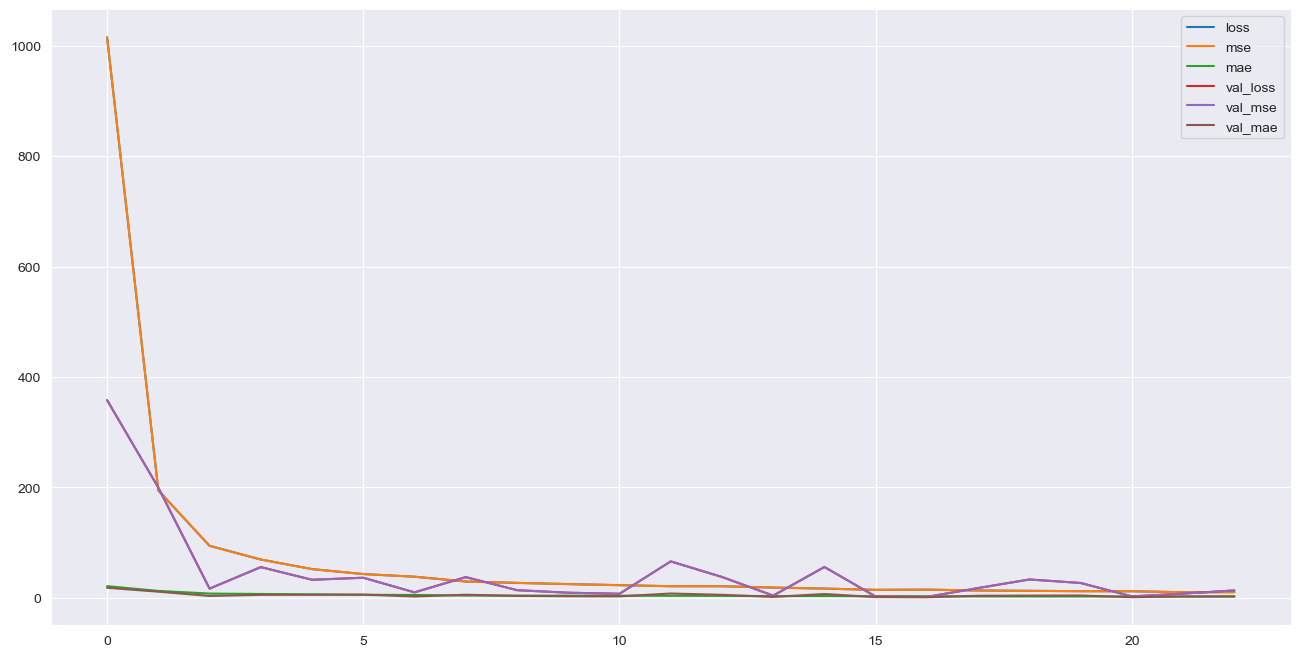

In [105]:
pd.DataFrame(baseline_model_history.history).plot(figsize=(16, 8))
plt.grid(True)
plt.show()

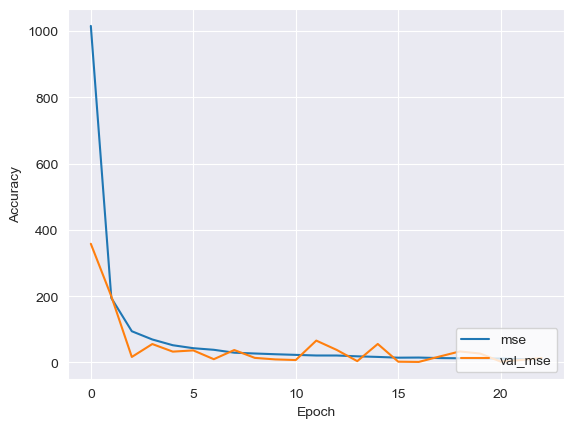

In [106]:

baseline_model_history.history.keys()
plt.plot(baseline_model_history.history['mse'], label='mse')
plt.plot(baseline_model_history.history['val_mse'], label = 'val_mse')
sb.set_style('whitegrid')
plt.plot(figsize=(10,5))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')
plt.show()


In [107]:
loss, mae, mse = baseline_model.evaluate(X_test, y_test)

58/58 [==============================] - 0s 7ms/step - loss: 13.2461 - mse: 13.2461 - mae: 2.5567


In [108]:
#print(X_test[:1])
y_pred = baseline_model.predict(X_test)
print(y_test)

58/58 [==============================] - 0s 3ms/step


2022-12-09 02:43:36.345719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5649     23.48480
6255     12.14950
6661      4.66768
601     180.26600
7217      1.85448
          ...    
5626     21.67710
6988      2.69486
4229     21.15690
7683      1.76782
6488      7.37049
Name: Close, Length: 1843, dtype: float64


In [82]:
stock_prediction_model = "stock_prediction_model.model"
tf.keras.models.save_model(baseline_model, stock_prediction_model)


INFO:tensorflow:Assets written to: stock_prediction_model.model/assets


In [83]:
converter = tf.lite.TFLiteConverter.from_saved_model(stock_prediction_model)

In [84]:
tflite_quant_model = converter.convert()
with tf.io.gfile.GFile('stockPredictionModelApp.tflite', 'wb') as f:
    f.write(tflite_quant_model)

2022-12-09 02:38:28.011587: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-12-09 02:38:28.011612: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-12-09 02:38:28.012310: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: stock_prediction_model.model
2022-12-09 02:38:28.013601: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-12-09 02:38:28.013610: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: stock_prediction_model.model
2022-12-09 02:38:28.016572: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2022-12-09 02:38:28.017343: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2022-12-09 02:38:28.054119: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: 

In [85]:
import pathlib

In [86]:
interpreter = tf.lite.Interpreter('stockPredictionModelApp.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_signature_list()
output_details = interpreter.get_signature_runner()

print(output_details.get_output_details)

<bound method SignatureRunner.get_output_details of <tensorflow.lite.python.interpreter.SignatureRunner object at 0x2bffb78e0>>


In [87]:
input_shape = input_details[0]['shape']
output_shape = output_details[0]['shape']

print(input_shape)
print(output_shape)

KeyError: 0

In [ ]:
print(input_details)
print(output_details)